## 데이터 로드

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## MNIST 이미지 확인 및 데이터 전처리

<function matplotlib.pyplot.show>

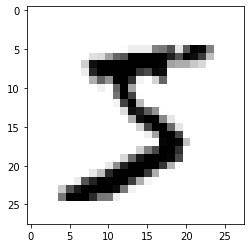

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## CNN 모델 생성

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## 훈련

In [9]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 39s 9ms/step - loss: 0.1754 - accuracy: 0.9456
Epoch 2/3
938/938 [==============================] - 8s 9ms/step - loss: 0.0492 - accuracy: 0.9844
Epoch 3/3
938/938 [==============================] - 8s 9ms/step - loss: 0.0342 - accuracy: 0.9894


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0317 - accuracy: 0.9887
test_acc =  0.9886999726295471
